## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# Run the data preprocessing notebook
data = pd.read_csv('docs/anxiety_attack_dataset.csv')

In [51]:
# There are not duplicated rows in the dataset
data.duplicated().value_counts()

False    12000
Name: count, dtype: int64

In [52]:
# There are not Na's in the data
for column in data:
    print(data[column].isna().value_counts())
    print(" ")


ID
False    12000
Name: count, dtype: int64
 
Age
False    12000
Name: count, dtype: int64
 
Gender
False    12000
Name: count, dtype: int64
 
Occupation
False    12000
Name: count, dtype: int64
 
Sleep Hours
False    12000
Name: count, dtype: int64
 
Physical Activity (hrs/week)
False    12000
Name: count, dtype: int64
 
Caffeine Intake (mg/day)
False    12000
Name: count, dtype: int64
 
Alcohol Consumption (drinks/week)
False    12000
Name: count, dtype: int64
 
Smoking
False    12000
Name: count, dtype: int64
 
Family History of Anxiety
False    12000
Name: count, dtype: int64
 
Stress Level (1-10)
False    12000
Name: count, dtype: int64
 
Heart Rate (bpm during attack)
False    12000
Name: count, dtype: int64
 
Breathing Rate (breaths/min)
False    12000
Name: count, dtype: int64
 
Sweating Level (1-5)
False    12000
Name: count, dtype: int64
 
Dizziness
False    12000
Name: count, dtype: int64
 
Medication
False    12000
Name: count, dtype: int64
 
Therapy Sessions (per month)
Fa

## Data preprocesing columns 10-14

In [4]:
# Family History of Anxiety (Yes/No)
print("We replace the values of the Family History of Anxiety feature with 1 for Yes and 0 for No")
# Simpler way to convert Yes/No to 1/0
data["Family History of Anxiety"] = data["Family History of Anxiety"].map({"Yes": 1, "No": 0})

# Obviously, there are no outliers for this feature, nor there is need for normalization

# Check for class imbalance
print("\n Class imbalance for the Dizziness feature")
print(data["Family History of Anxiety"].value_counts(normalize=True))
print("We can see that the classes are more or less balanced")

We replace the values of the Family History of Anxiety feature with 1 for Yes and 0 for No

 Class imbalance for the Dizziness feature
Family History of Anxiety
0    0.59825
1    0.40175
Name: proportion, dtype: float64
We can see that the classes are more or less balanced


In [10]:
# Stress Level (1-10) (Numerical variable)
# We check the distribution of the variable
print("The distribution of the Stress Level (1-10) feature")
print(data["Stress Level (1-10)"].describe())

# There are no outliers in the Stress Level (1-10) feature since all values go from 1 to 10

# Check class imbalance
print("\n We check for class imbalance in the Diet Quality (1-10) feature")
print(data["Stress Level (1-10)"].value_counts(normalize=True))
print("We can see that the classes are completely balanced")

# Normalize the variable
data["Stress Level (1-10)"] = StandardScaler().fit_transform(data[["Stress Level (1-10)"]])

The distribution of the Stress Level (1-10) feature
count    1.200000e+04
mean    -1.059893e-16
std      1.000042e+00
min     -1.405108e+00
25%     -6.981058e-01
50%      8.896445e-03
75%      7.158987e-01
max      1.422901e+00
Name: Stress Level (1-10), dtype: float64

 We check for class imbalance in the Diet Quality (1-10) feature
Stress Level (1-10)
-1.405108    0.202417
-0.698106    0.202083
 0.715899    0.199667
 0.008896    0.198500
 1.422901    0.197333
Name: proportion, dtype: float64
We can see that the classes are completely balanced


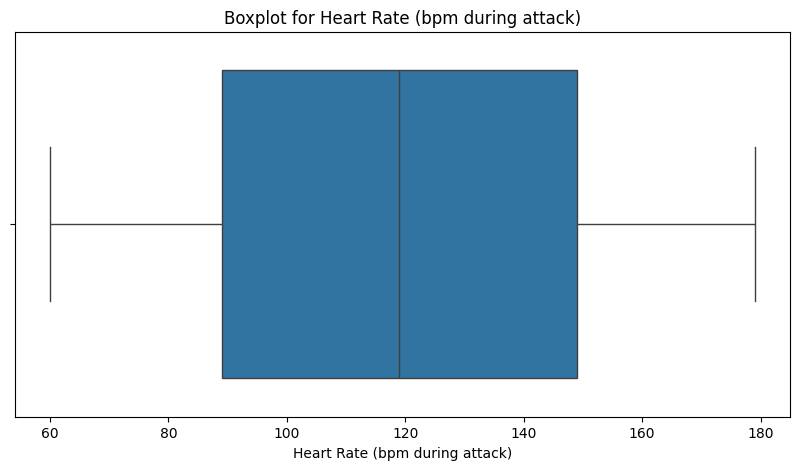

Number of outliers in 'Heart Rate (bpm during attack)': 0


In [11]:
# Boxplot for Heart Rate (bpm during attack)
plt.figure(figsize=(10, 5))
sns.boxplot(x=data["Heart Rate (bpm during attack)"])
plt.title("Boxplot for Heart Rate (bpm during attack)")
plt.show()

# Detect outliers using IQR
def detect_and_handle_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Number of outliers in '{column}': {len(outliers)}")

    # Handle outliers by clipping
    data[column] = data[column].clip(lower_bound, upper_bound)


detect_and_handle_outliers("Heart Rate (bpm during attack)")

# Initialize scaler
scaler = StandardScaler()

# Normalize Heart Rate
data["Heart Rate (bpm during attack)"] = scaler.fit_transform(data[["Heart Rate (bpm during attack)"]])

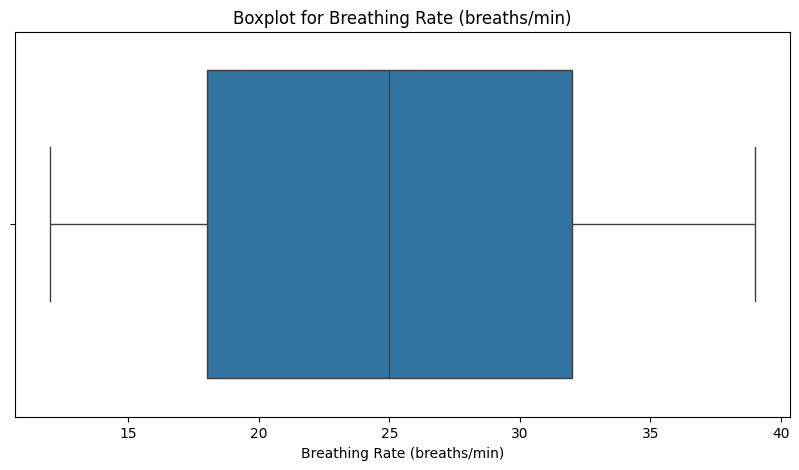

Number of outliers in 'Breathing Rate (breaths/min)': 0


In [12]:
# Boxplot for Breathing Rate (breaths/min)
plt.figure(figsize=(10, 5))
sns.boxplot(x=data["Breathing Rate (breaths/min)"])
plt.title("Boxplot for Breathing Rate (breaths/min)")
plt.show()

# Detect outliers using IQR
detect_and_handle_outliers("Breathing Rate (breaths/min)")

# Normalize Heart Rate
data["Breathing Rate (breaths/min)"] = scaler.fit_transform(data[["Breathing Rate (breaths/min)"]])

In [13]:
# Sweating Level (1-5) (Numerical variable)
# We check the distribution of the variable
print("The distribution of the Sweating Level (1-5) feature")
print(data["Sweating Level (1-5)"].describe())

# There are no outliers in the Sweating Level (1-5) feature since all values go from 1 to 10

# Check class imbalance
print("\n We check for class imbalance in the Diet Quality (1-10) feature")
print(data["Sweating Level (1-5)"].value_counts(normalize=True))
print("We can see that the classes are completely balanced")

# Normalize the variable
data["Sweating Level (1-5)"] = StandardScaler().fit_transform(data[["Sweating Level (1-5)"]])

The distribution of the Sweating Level (1-5) feature
count    12000.000000
mean         2.987417
std          1.414482
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Sweating Level (1-5), dtype: float64

 We check for class imbalance in the Diet Quality (1-10) feature
Sweating Level (1-5)
1    0.202417
2    0.202083
4    0.199667
3    0.198500
5    0.197333
Name: proportion, dtype: float64
We can see that the classes are completely balanced
